In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.pipeline import Pipeline
from pyearth import Earth
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Carrega dados e separa as amoastras
link = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
dados = pd.read_csv(link).select_dtypes(['number'])

y = dados['maximum_temprature']
X = dados.loc[:, dados.columns != 'maximum_temprature']

a) **Criação de pipelines** Usando pipelines, crie três diferentes pré processamentos para as features numéricas da base: a) uma sem transformações, b) outra fazendo estandardiazação das variáveis e c) outra incluindo alguns polinômios. As pipelines devem usar regressão linear simples como modelo para predizer a variável maximum_temprature.

In [3]:
def get_rmse_reg():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    reg = LinearRegression().fit(X_train, Y_train)

    return mean_squared_error(Y_test, reg.predict(X_test))

get_rmse_reg()

2.9575021585590218

In [4]:
def get_rmse_scale_reg():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('lm', LinearRegression())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))
    
get_rmse_scale_reg()

3.1569162229986207

In [5]:
def get_rmse_scale_poly_reg():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('lm', LinearRegression())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))

get_rmse_scale_poly_reg()

2.986156762330941

b) **Benchmark** Compare as pipelines anteriores rodando 100 vezes cada uma usando holdout com 70% das observações em treino, calculando para cada também o RMSE. Reporte os resultados por meio de um gráfico de boxplot. Dica: use uma função para encapsular pipelines, treino dos modelos e cálculo de métricas de validação.

In [6]:
rmse_reg = [get_rmse_reg() for i in range(100)]
rmse_scale_reg = [get_rmse_scale_reg() for i in range(100)]
rmse_scale_poly_reg = [get_rmse_scale_poly_reg() for i in range(100)]

<AxesSubplot:xlabel='variable', ylabel='rmse'>

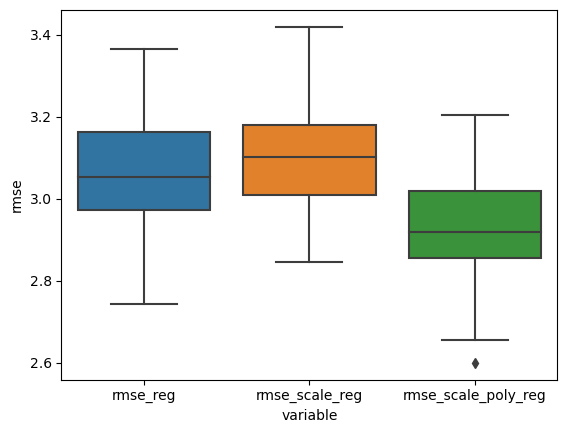

In [7]:
rmse = pd.DataFrame({
    'rmse_reg': rmse_reg,
    'rmse_scale_reg': rmse_scale_reg,
    'rmse_scale_poly_reg': rmse_scale_poly_reg
})

rmse = pd.melt(rmse, value_name='rmse', value_vars=['rmse_reg', 'rmse_scale_reg', 'rmse_scale_poly_reg'])

sns.boxplot(data=rmse, x='variable', y='rmse')

c) **Comparação dos modelos** Selecione a melhor pipeline do exercício anterior e crie outras três novas em cima dela: uma que regressão por KNN em vez de regressão linear, uma que use MARS (o algoritmo earth); e, por fim, uma que use regressão por meio de árvore de decisão (tree ou regr.rpart). Rode 100 vezes cada pipeline e compare novamente od RMSE usando um gráfico boxplot.

In [8]:
def get_rmse_scale_poly_knn():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('knn', KNeighborsClassifier())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))

def get_rmse_scale_poly_mars():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('mars', Earth())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))

def get_rmse_scale_poly_tree():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('tree', tree.DecisionTreeClassifier())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))

In [9]:
rmse_scale_poly_knn = [get_rmse_scale_poly_knn() for i in range(100)]
rmse_scale_poly_mars = [get_rmse_scale_poly_mars() for i in range(100)]
rmse_scale_poly_tree = [get_rmse_scale_poly_tree() for i in range(100)]

<AxesSubplot:xlabel='variable', ylabel='rmse'>

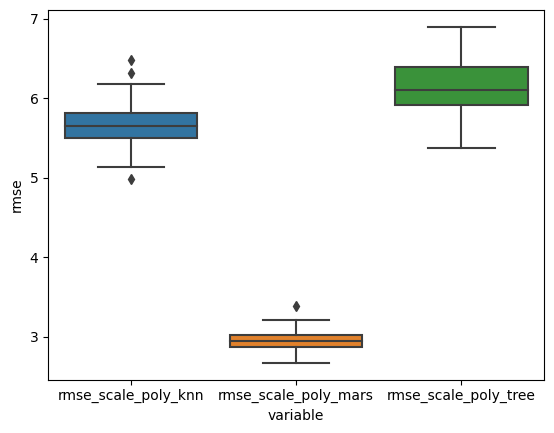

In [10]:
rmse = pd.DataFrame({
    'rmse_scale_poly_knn': rmse_scale_poly_knn,
    'rmse_scale_poly_mars': rmse_scale_poly_mars,
    'rmse_scale_poly_tree': rmse_scale_poly_tree
})

rmse = pd.melt(rmse, value_name='rmse', value_vars=['rmse_scale_poly_knn', 'rmse_scale_poly_mars', 'rmse_scale_poly_tree'])

sns.boxplot(data=rmse, x='variable', y='rmse')

d) **Validação** Usando a melhor *pipeline* encontrada no exercício anterior, faça validação nas seguintes bases de dados:

In [13]:
# Clima em Campinas
campinas = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
campinas = pd.read_csv(campinas)
campinas = campinas.select_dtypes(['number'])
y_camp = campinas['maximum_temprature']
X_camp = campinas.loc[:, dados.columns != 'maximum_temprature']

# Clima em Southampton
southampton = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/master/web%20scraping/Cleaned%20Data/United%20Kingdom_Southampton_Cleaned.csv'
southampton = pd.read_csv(southampton)
y_sh = southampton['maximum_temprature']
X_sh = southampton.loc[:, southampton.columns != 'maximum_temprature']

e) **Visualização** Usando os resultados da melhor *pipeline*, plote a relação entre predições e valores reais de `maximum_temprature` nas duas bases de validação.

**2) Árvores de decisão e *bag-of-words***

Como vimos, pré-processamento deve ser aplicado *antes* de fazermos *split sample* de validação (i.e., criar amostras de teste e de treino). Agora, implemente um *workflow* que leva isso em conta. Para tanto, você deverá criar uma função que separe textos em treino e teste, que aplique pré-processamento apenas na amostra de treino e que, depois, replique ele na amostra de teste para, então, rodar um algoritmo e calcular alguma métrica de validação.


Para esse exercício, será necessário carregar uma base de discursos presidenciais feitos por Dilma Rousseff e Michel Temer em parte de seus mandatos:

In [ ]:
link = 'https://github.com/FLS-6497/datasets/raw/main/aula5/discursos_presidenciais.csv'
discursos = pd.read_csv(link, sep=';')

Também precisaremos fazer pré-processamento dos textos:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer() # Ha mais hyperparametros
X = vct.fit_transform(discursos.discurso)

**a) *Pipelines***

Usando *pipelines*, crie duas *pipelines* diferentes de pré-processamentos para as os discursos da base: a) uma que só mantenha termos que aparecem em pelo menos 20% dos documentos (ou ao menos em 20 documentos); outra igual a anterior que permita bi-gramas. As *pipelines* devem usar *Naive Bayes* como modelo para predizer a variável `planalto`.


**b) Benchmark**

Rode cada *pipeline* 10 vezes, calculando o `F1` de cada predição do modelo na base de teste que tenha 20% dos discursos. Plote os resultados usando boxplot.

**c) Modelos**

Use a melhor *pipeline* para criar outra, que em vez de *Naive Bayes* use árvore de decisão (`classif.rpart`, no caso do `mlr3`). Rode 10 vezes cada uma, calcule e reporte o `F1` para cada uma.
